# Pre - processing

#### Do the following on titanic dataset.

1. Load the dataset into python environment

2. Make ‘PassengerId’ as the index column

3. Check the basic details of the dataset

4. Fill in all the missing values present in all the columns in the dataset

5. Check and handle outliers in at least 3 columns in the dataset

6. Do min max scaling on the feature set (Take ‘Survived’ as target)

### Importing Libraries

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import scipy
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score

## 1. Load the dataset into python environment

In [81]:
data=pd.read_csv('titanic_dataset.csv')

In [82]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [84]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 2. Make ‘PassengerId’ as the index column

In [85]:
data=pd.read_csv('titanic_dataset.csv',index_col='PassengerId')

In [86]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


## 3. Check the basic details of the dataset

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [88]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [89]:
data.shape

(891, 11)

In [90]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [91]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 4. Fill in all the missing values present in all the columns in the dataset

In [92]:
for i in ['Age']:
    data[i]=data[i].fillna(data[i].median())

In [93]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [94]:
data.Embarked.fillna(data.Embarked.mode()[0], inplace = True)

In [95]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [96]:
data.Cabin = data.Cabin.fillna('NA')

In [97]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

## 5. Check and handle outliers in at least 3 columns in the dataset

Text(0.5, 1.0, 'Box plot of Survived')

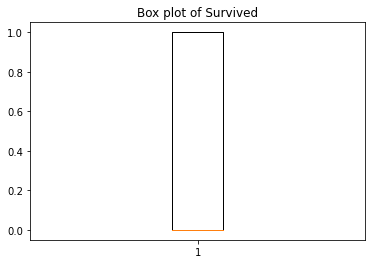

In [98]:
plt.boxplot(data['Survived'])
plt.title('Box plot of Survived')

Text(0.5, 1.0, 'Box plot of SibSp')

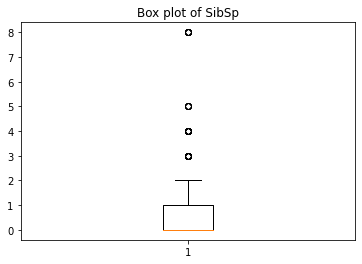

In [99]:
plt.boxplot(data['SibSp'])
plt.title('Box plot of SibSp')

In [100]:
Q1 = np.percentile(data['SibSp'], 25, interpolation = 'midpoint')
Q2 = np.percentile(data['SibSp'], 50, interpolation = 'midpoint')
Q3 = np.percentile(data['SibSp'], 75, interpolation = 'midpoint')

In [101]:
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [102]:
IQR = Q3 - Q1

In [103]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

In [104]:
print(low_lim)
print(up_lim)

-1.5
2.5


In [105]:
outlier = []
for x in data['SibSp']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [106]:
outlier

[3,
 4,
 3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 4,
 8,
 4,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 4,
 8,
 4,
 8]

In [107]:
ind1 = data['SibSp']>up_lim
data.loc[ind1].index

Int64Index([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864],
           dtype='int64', name='PassengerId')

In [108]:
data.drop([8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864], inplace=True)

Text(0.5, 1.0, 'Box plot of SibSp')

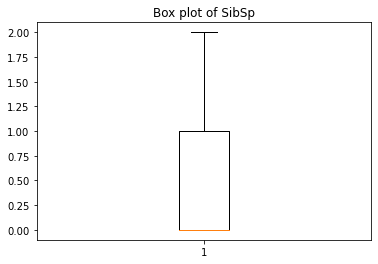

In [109]:
plt.boxplot(data['SibSp'])
plt.title('Box plot of SibSp')

Text(0.5, 1.0, 'Box plot of Parch')

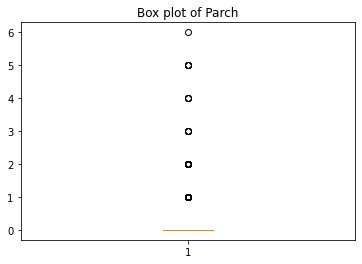

In [136]:
plt.boxplot(data['Parch'])
plt.title('Box plot of Parch')

In [111]:
Q1 = np.percentile(data['Parch'], 25, interpolation = 'midpoint')
Q2 = np.percentile(data['Parch'], 50, interpolation = 'midpoint')
Q3 = np.percentile(data['Parch'], 75, interpolation = 'midpoint')

In [112]:
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
0.0


In [113]:
IQR = Q3 - Q1

In [114]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

In [115]:
print(low_lim)
print(up_lim)

0.0
0.0


In [116]:
outlier = []
for x in data['Parch']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [117]:
outlier

[2,
 1,
 5,
 5,
 2,
 1,
 2,
 1,
 2,
 3,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 4,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 3,
 4,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 4,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 5,
 2,
 1,
 1,
 1,
 1,
 5,
 1,
 1,
 1,
 2,
 1,
 6,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 3,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 5,
 2]

In [137]:
ind1 = data['Parch']>up_lim
data.loc[ind1].index

Int64Index([  9,  11,  14,  26,  44,  55,  59,  66,  79,  87,
            ...
            854, 856, 857, 859, 870, 872, 880, 881, 886, 889],
           dtype='int64', name='PassengerId', length=169)

## 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [120]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [121]:
data.drop('Pclass',axis=1,inplace=True)
data.drop('Sex',axis=1,inplace=True)
data.drop('Age',axis=1,inplace=True)

In [122]:
data=pd.get_dummies(data)

In [123]:
data.head()

,Survived,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel","Name_Abelson, Mrs. Samuel (Hannah Wizosky)","Name_Adahl, Mr. Mauritz Nils Martin",...,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_NA,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,7.2500,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,1,1,0,71.2833,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,7.9250,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,1,1,0,53.1000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,8.0500,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [124]:
x=data.drop('Survived',axis=1)

In [125]:
x.describe()

,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel","Name_Abelson, Mrs. Samuel (Hannah Wizosky)","Name_Adahl, Mr. Mauritz Nils Martin","Name_Adams, Mr. John",...,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_NA,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
count,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,...,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000
mean,0.313609,0.317160,31.120305,0.001183,0.001183,0.001183,0.001183,0.001183,0.001183,0.001183,...,0.003550,0.003550,0.001183,0.002367,0.004734,0.762130,0.001183,0.198817,0.086391,0.714793
std,0.530909,0.765829,48.973215,0.034401,0.034401,0.034401,0.034401,0.034401,0.034401,0.034401,...,0.059514,0.059514,0.034401,0.048622,0.068680,0.426031,0.034401,0.399346,0.281106,0.451780
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,2.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [126]:
y=data['Survived']

In [127]:
from sklearn import preprocessing
min_max= preprocessing.MinMaxScaler(feature_range=(0,1))

In [130]:
x= min_max.fit_transform(x)

In [134]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.2)
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)
print('MSE is:',mean_squared_error(y_test,predictions))
print('r2 score is:',r2_score(y_test,predictions))

MSE is: 0.19899711302896436
r2 score is: 0.10183998969338637
